In [ ]:
# Importing modules and Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Read the files
Train_Claim = pd.read_csv("/content/gdrive/MyDrive/TrainData_withoutTarget/Train_Claim.csv",na_values =["MISSINGVALUE","MISSEDDATA"])
Train_Demo = pd.read_csv("/content/gdrive/MyDrive/TrainData_withoutTarget/Train_Demographics.csv")
Train_Policy = pd.read_csv("/content/gdrive/MyDrive/TrainData_withoutTarget/Train_Policy.csv", na_values=["-1", "MISSINGVAL"])
Train_Vehicle = pd.read_csv("/content/gdrive/MyDrive/TrainData_withoutTarget/Train_Vehicle.csv", na_values="???")
Train_no_target= pd.read_excel("/content/gdrive/MyDrive/TrainData_withoutTarget/Traindata_withoutTarget.xlsx")

# **Understanding the data in each file**

In [ ]:
# Checking number of Records and Attributes for each file
print(Train_Claim.shape)
print(Train_Demo.shape)
print(Train_Policy.shape)
print(Train_Vehicle.shape)
print(Train_no_target.shape)

(28836, 19)
(28836, 10)
(28836, 10)
(115344, 3)
(28836, 2)


In [ ]:
# Printing columns names in each file
print(Train_Claim.columns)
print("-----------------------------------------------------------------------------------")
print(Train_Demo.columns)
print("-----------------------------------------------------------------------------------")
print(Train_Policy.columns)
print("-----------------------------------------------------------------------------------")
print(Train_Vehicle.columns)
print("-----------------------------------------------------------------------------------")
print(Train_no_target.columns)

Index(['CustomerID', 'DateOfIncident', 'TypeOfIncident', 'TypeOfCollission',
       'SeverityOfIncident', 'AuthoritiesContacted', 'IncidentState',
       'IncidentCity', 'IncidentAddress', 'IncidentTime', 'NumberOfVehicles',
       'PropertyDamage', 'BodilyInjuries', 'Witnesses', 'PoliceReport',
       'AmountOfTotalClaim', 'AmountOfInjuryClaim', 'AmountOfPropertyClaim',
       'AmountOfVehicleDamage'],
      dtype='object')
-----------------------------------------------------------------------------------
Index(['CustomerID', 'InsuredAge', 'InsuredZipCode', 'InsuredGender',
       'InsuredEducationLevel', 'InsuredOccupation', 'InsuredHobbies',
       'CapitalGains', 'CapitalLoss', 'Country'],
      dtype='object')
-----------------------------------------------------------------------------------
Index(['InsurancePolicyNumber', 'CustomerLoyaltyPeriod',
       'DateOfPolicyCoverage', 'InsurancePolicyState',
       'Policy_CombinedSingleLimit', 'Policy_Deductible',
       'PolicyAnnual

In [ ]:
# Checking unique ID's in each file
print(Train_Claim.CustomerID.nunique())
print(Train_Demo.CustomerID.nunique())
print(Train_Policy.CustomerID.nunique())
print(Train_Vehicle.CustomerID.nunique())
print(Train_no_target.CustomerID.nunique())

28836
28836
28836
28836
28836


In [ ]:
i1=list(set(Train_no_target.CustomerID)-set(Train_Claim.CustomerID))
print(len(i1))
i2=list(set(Train_Claim.CustomerID)-set(Train_no_target.CustomerID))
print(len(i2))
i3 = list(set(Train_no_target.CustomerID)-set(Train_Policy.CustomerID))
print(len(i3))
i4 = list(set(Train_no_target.CustomerID)-set(Train_Demo.CustomerID))
print(len(i4))
i5= list(set(Train_no_target.CustomerID)-set(Train_Vehicle.CustomerID))
print(len(i5))

0
0
0
0
0


**Observation**:
  Same CustomerID's in all the files

In [ ]:
Train_no_target.drop('ReportedFraud', axis=1, inplace=True)

In [ ]:
df= pd.crosstab(Train_Vehicle['CustomerID'], Train_Vehicle['VehicleAttribute'],Train_Vehicle['VehicleAttributeDetails'],aggfunc='first',rownames=['CustomerID'],colnames=['VehicleAttribute'])


In [ ]:
df.head()

VehicleAttribute,VehicleID,VehicleMake,VehicleModel,VehicleYOM
CustomerID,,,,
Cust10000,Vehicle26917,Audi,A5,2008
Cust10001,Vehicle15893,Audi,A5,2006
Cust10002,Vehicle5152,Volkswagen,Jetta,1999
Cust10003,Vehicle37363,Volkswagen,Jetta,2003
Cust10004,Vehicle28633,Toyota,CRV,2010


In [ ]:
# Merging files into Consolidated one
df1 = pd.merge(Train_no_target, Train_Claim, on='CustomerID', how='left')
df2 = pd.merge(df1, Train_Demo, on='CustomerID', how='left')
df3 = pd.merge(df2, Train_Policy, on='CustomerID', how='left')
merged_data = pd.merge(df3, df,on='CustomerID', how='left' )


In [ ]:
# Displaying first few records
merged_data.head()

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,VehicleID,VehicleMake,VehicleModel,VehicleYOM
0,Cust20065,2015-01-09,Multi-vehicle Collision,Rear Collision,Total Loss,Other,State9,City4,Location 1404,19,3,?,1,1.0,?,43973.0,9396,4698,29879,58,471784,MALE,JD,sales,video-games,0,-42700,India,129186,432,1998-11-14,State2,250/500,2000,1142.87,0,own-child,Vehicle30662,Mercedes,E400,2005
1,Cust37589,2015-02-20,Single Vehicle Collision,Side Collision,Minor Damage,Ambulance,State4,City3,Location 1675,14,1,?,1,1.0,YES,62310.0,6539,6539,49232,34,431937,FEMALE,High School,transport-moving,polo,51300,0,India,146710,128,2000-08-19,State2,100/300,1000,1274.38,2857344,own-child,Vehicle17183,Toyota,Highlander,2010
2,Cust24312,2015-01-14,Multi-vehicle Collision,Side Collision,Major Damage,Ambulance,State5,City2,Location 1546,21,3,?,0,0.0,?,42824.0,6069,6069,30686,52,479320,FEMALE,PhD,machine-op-inspct,exercise,0,0,India,133433,346,2000-06-23,State1,500/1000,745,1269.93,0,other-relative,Vehicle33982,Volkswagen,Passat,2002
3,Cust5493,2015-01-07,Multi-vehicle Collision,Side Collision,Major Damage,Ambulance,State7,City4,Location 1413,12,3,YES,2,0.0,?,45672.0,253,5741,39678,25,607763,FEMALE,College,exec-managerial,exercise,47400,-56100,India,114614,42,1992-01-15,State2,100/300,986,1218.60,0,other-relative,Vehicle12299,Toyota,Highlander,2011
4,Cust7704,2015-02-26,Multi-vehicle Collision,Side Collision,Major Damage,Other,State4,City6,Location 1367,3,3,NO,1,2.0,NO,81472.0,7407,14813,59252,27,441783,MALE,Masters,sales,chess,0,0,India,116825,109,2001-09-23,State3,250/500,576,1431.02,4235779,unmarried,Vehicle30447,Ford,Wrangler,2010


In [ ]:
merged_data.shape

(28836, 41)

In [ ]:
Train_Vehicle.shape

(115344, 3)

In [ ]:
Train_Vehicle.head(3)

,CustomerID,VehicleAttribute,VehicleAttributeDetails
0,Cust20179,VehicleID,Vehicle8898
1,Cust21384,VehicleModel,Malibu
2,Cust33335,VehicleMake,Toyota


In [ ]:
Train_Vehicle.nunique()

CustomerID                 28836
VehicleAttribute               4
VehicleAttributeDetails    28910
dtype: int64

In [ ]:
# Checking for missing values
merged_data.isnull().sum()

CustomerID                      0
DateOfIncident                  0
TypeOfIncident                  0
TypeOfCollission                0
SeverityOfIncident              0
AuthoritiesContacted            0
IncidentState                   0
IncidentCity                    0
IncidentAddress                 0
IncidentTime                    0
NumberOfVehicles                0
PropertyDamage                  0
BodilyInjuries                  0
Witnesses                      46
PoliceReport                    0
AmountOfTotalClaim             50
AmountOfInjuryClaim             0
AmountOfPropertyClaim           0
AmountOfVehicleDamage           0
InsuredAge                      0
InsuredZipCode                  0
InsuredGender                  30
InsuredEducationLevel           0
InsuredOccupation               0
InsuredHobbies                  0
CapitalGains                    0
CapitalLoss                     0
Country                         2
InsurancePolicyNumber           0
CustomerLoyalt

In [ ]:
unknowns = {}
for i in list(merged_data.columns):
    if (merged_data[i]).dtype == object:
        j = np.sum(merged_data[i] == "?")
        unknowns[i] = j
unknowns = pd.DataFrame.from_dict(unknowns, orient = 'index')
print(unknowns)

                                0
CustomerID                      0
DateOfIncident                  0
TypeOfIncident                  0
TypeOfCollission             5162
SeverityOfIncident              0
AuthoritiesContacted            0
IncidentState                   0
IncidentCity                    0
IncidentAddress                 0
PropertyDamage              10459
PoliceReport                 9805
InsuredGender                   0
InsuredEducationLevel           0
InsuredOccupation               0
InsuredHobbies                  0
Country                         0
DateOfPolicyCoverage            0
InsurancePolicyState            0
Policy_CombinedSingleLimit      0
InsuredRelationship             0
VehicleID                       0
VehicleMake                     0
VehicleModel                    0
VehicleYOM                      0


**Observation**:
  There are huge misssing values for the attributes such as Type of collision, Property damage and Police report. These attributes need to be investigated first.


In [ ]:
merged_data.dtypes

CustomerID                     object
DateOfIncident                 object
TypeOfIncident                 object
TypeOfCollission               object
SeverityOfIncident             object
AuthoritiesContacted           object
IncidentState                  object
IncidentCity                   object
IncidentAddress                object
IncidentTime                    int64
NumberOfVehicles                int64
PropertyDamage                 object
BodilyInjuries                  int64
Witnesses                     float64
PoliceReport                   object
AmountOfTotalClaim            float64
AmountOfInjuryClaim             int64
AmountOfPropertyClaim           int64
AmountOfVehicleDamage           int64
InsuredAge                      int64
InsuredZipCode                  int64
InsuredGender                  object
InsuredEducationLevel          object
InsuredOccupation              object
InsuredHobbies                 object
CapitalGains                    int64
CapitalLoss 

In [ ]:
merged_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerID,28836,28836,Cust30422,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DateOfIncident,28836,72,2015-01-10,661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TypeOfIncident,28836,4,Multi-vehicle Collision,11966,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TypeOfCollission,28836,4,Rear Collision,8561,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeverityOfIncident,28836,4,Minor Damage,10400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AuthoritiesContacted,28836,5,Police,8324,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IncidentState,28836,7,State5,7886,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IncidentCity,28836,7,City2,4486,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IncidentAddress,28836,1000,Location 1341,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IncidentTime,28836,NaN,NaN,NaN,11.746,6.17007,-5,6,12,17,23


In [ ]:
x = merged_data.TypeOfCollission.value_counts()
x = x.sort_values()
x

?                  5162
Front Collision    7246
Side Collision     7867
Rear Collision     8561
Name: TypeOfCollission, dtype: int64

# **Exploratory Data Analysis**

Text(0, 0.5, 'Number of Records')

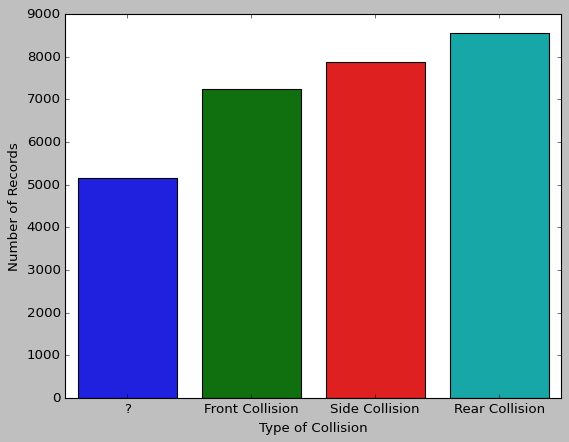

In [ ]:
# See the type of collision
plt.style.use('classic')
sns.barplot(x=x.index, y=x)
plt.xlabel('Type of Collision')
plt.ylabel('Number of Records')

In [ ]:
merged_data.NumberOfVehicles.value_counts()

1    16169
3     9711
2     2276
4      680
Name: NumberOfVehicles, dtype: int64

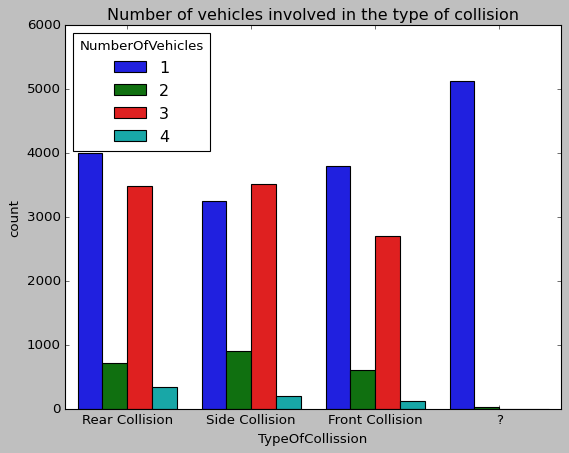

In [ ]:
# Checking number of vehicles involved in the type of collison
plt.title("Number of vehicles involved in the type of collision")
plt.xlabel("Type of collision")
sns.countplot(x="TypeOfCollission", hue="NumberOfVehicles", data=merged_data)

**Observation**:
  For all the records where type of collision information is not available, the number of vehicles involved in the incident is only one.

In [ ]:
merged_data.AuthoritiesContacted.value_counts(sort=True)

Police       8324
Fire         6518
Ambulance    5732
Other        5570
None         2692
Name: AuthoritiesContacted, dtype: int64

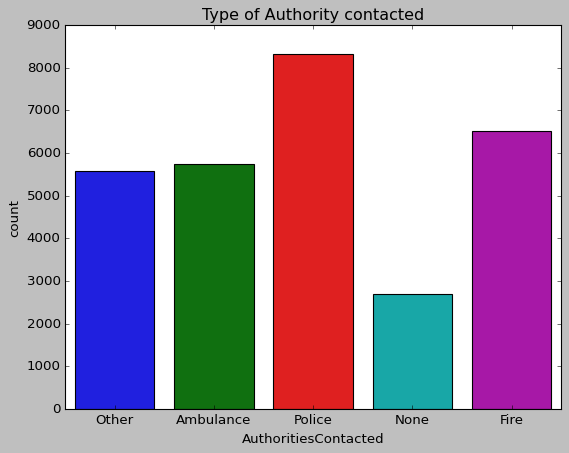

In [ ]:
# See whether the authorities had been contacted or not after the incident
plt.title("Type of Authority contacted")
sns.countplot(x="AuthoritiesContacted", data=merged_data)

**Observation**:
  For most of the records the authorities had been contacted. For few records the authorities had not been contacted. check for total amount of claim for these records.
  

Text(0.5, 1.0, 'Type of Authorities contacted VS amount Of Total Claim')

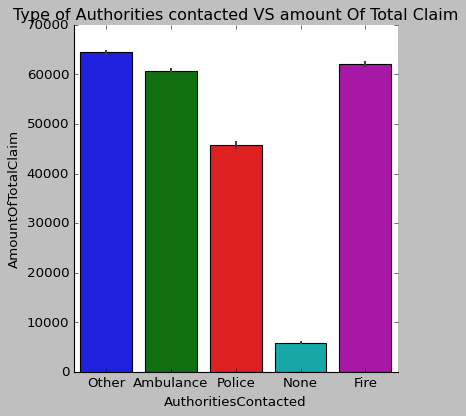

In [ ]:
# Check for the type of authorities contacted versus Amount of Total Claim
sns.catplot( x="AuthoritiesContacted", y="AmountOfTotalClaim", kind="bar", data=merged_data)
plt.title("Type of Authorities contacted VS amount Of Total Claim")

**Observation**: For those records where no authorities had been contacted the mean amount of total claim is less. These may be small injuries like dents etc.,

In [ ]:
merged_data.PoliceReport.value_counts(sort=True)

NO     9898
?      9805
YES    9133
Name: PoliceReport, dtype: int64

Text(0.5, 1.0, 'Police Report present or not')

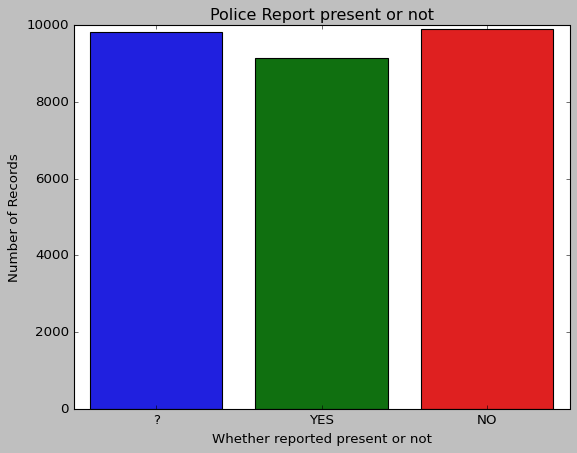

In [ ]:
# For how many records police report is missing
sns.countplot(x='PoliceReport', data=merged_data)
plt.xlabel('Whether reported present or not')
plt.ylabel('Number of Records')
plt.title('Police Report present or not')

**observation**:
  There are several records where police report seems missing and information not available. These records need to be investigated.

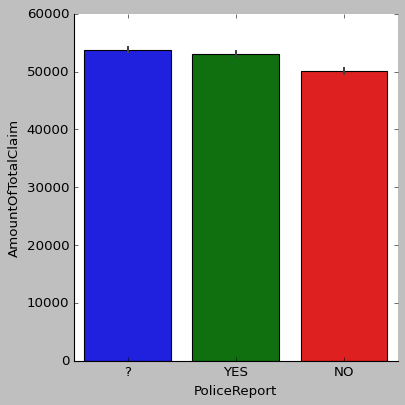

In [ ]:
# See the sum of amount claimed for the records where police report seems missing
sns.catplot(x="PoliceReport", y="AmountOfTotalClaim", kind="bar", data=merged_data)

**Observation**:
  Significant amount had been claimed for the records where police reports are not available and for the missing values. These records need to be investigated further. Check for severity of Incident for these records.

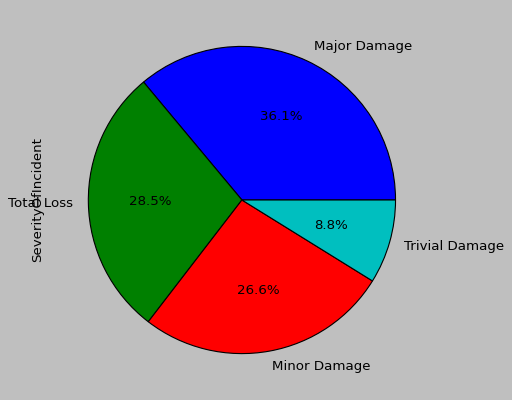

In [ ]:
# Pie chart
fig = plt.figure(figsize=(10,6))
ax = (merged_data['SeverityOfIncident'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Major Damage', 'Total Loss', 'Minor Damage', 'Trivial Damage'],
         fontsize=12)

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = (merged_data['SeverityOfIncident'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Major Damage', 'Total Loss', 'Minor Damage', 'Trivial Damage'],
         fontsize=12)

**Observation**:
  About more than 60 percent of the incidents involves either major loss or Total loss.

In [ ]:
merged_data.SeverityOfIncident.value_counts()

Minor Damage      10400
Total Loss         8218
Major Damage       7671
Trivial Damage     2547
Name: SeverityOfIncident, dtype: int64

Text(0.5, 1.0, 'Severity of Incident VS Amount of Total Claim')

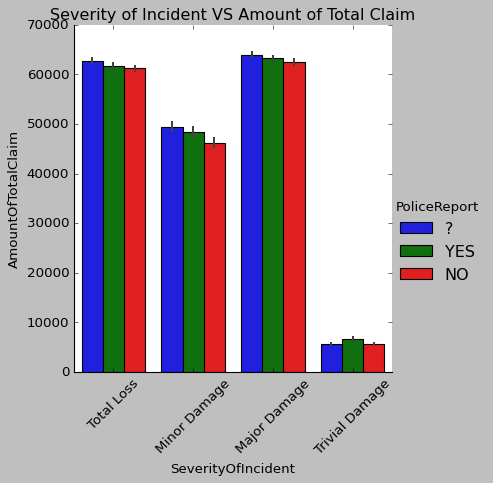

In [ ]:
# Severity of Incident VS Amount of Total Claim
ax = sns.catplot(x="SeverityOfIncident", y="AmountOfTotalClaim", hue="PoliceReport", kind="bar", orient="v", data=merged_data)
ax.set_xticklabels(rotation=45)
plt.title('Severity of Incident VS Amount of Total Claim')

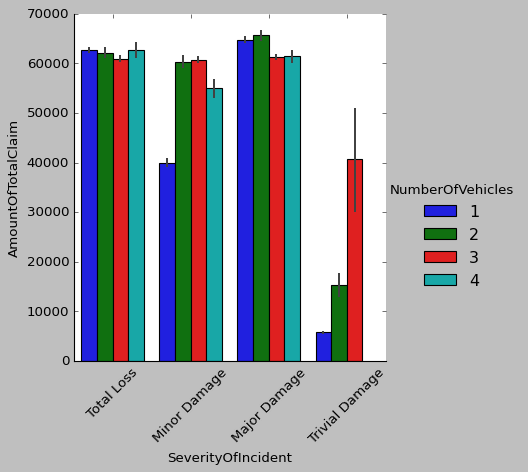

In [ ]:
# Number of vehicles invoved in the type of incident
p = sns.catplot(x="SeverityOfIncident", y="AmountOfTotalClaim", hue="NumberOfVehicles", kind="bar", orient="v", data=merged_data)
p.set_xticklabels(rotation=45)

**Observation**:
   Huge sum of amount had been claimed for the records where there is a major damage and total loss but police reports had been missed. These records need to be observed. See whether there are witness for these records.
  


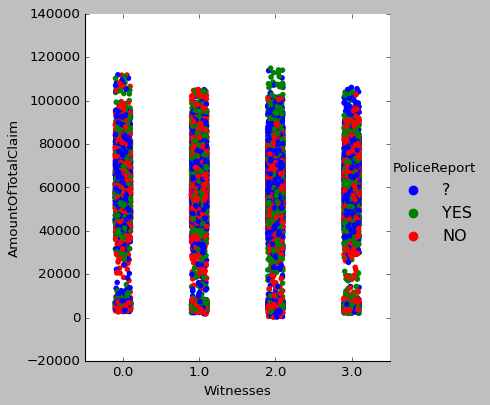

In [ ]:
# Witnesses present or not
sns.catplot(x='Witnesses', y='AmountOfTotalClaim', hue='PoliceReport', data=merged_data)

In [ ]:
no_report1 = merged_data[merged_data.PoliceReport=="NO"]
Total_loss = no_report1[no_report.SeverityOfIncident== "Total Loss"]
num_witness1= Total_loss.groupby(['CustomerID','PoliceReport','SeverityOfIncident','AmountOfTotalClaim']).agg({'Witnesses':'sum'})
num_witness1.head()

,,,,Witnesses
CustomerID,PoliceReport,SeverityOfIncident,AmountOfTotalClaim,
Cust10024,NO,Total Loss,80425.0,0.0
Cust10061,NO,Total Loss,53298.0,0.0
Cust10081,NO,Total Loss,82240.0,2.0
Cust10082,NO,Total Loss,75142.0,3.0
Cust10083,NO,Total Loss,77942.0,3.0


In [ ]:
merged_data.PropertyDamage.value_counts()


?      10459
NO      9687
YES     8690
Name: PropertyDamage, dtype: int64

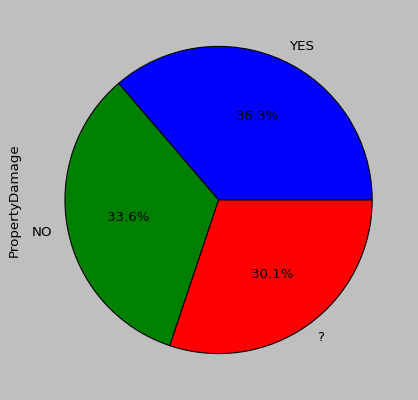

In [ ]:
# Since property damage also have significant number of missing values. let's study them seperately
fig = plt.figure(figsize=(10,6))
ax = (merged_data['PropertyDamage'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['YES', 'NO', '?'],
         fontsize=12)

**Observation**:
  There are significant number of records where property had not been damaged and where the values are missing for the records. so check if the amount for property damage had been claimed or not.

Text(0.5, 1.0, 'Property Damage VS Amount Of Property Claim')

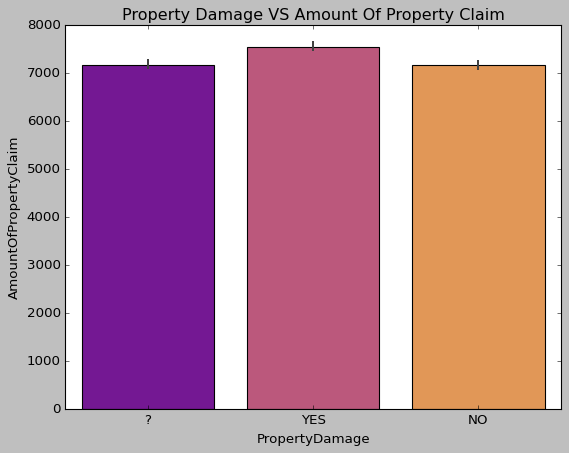

In [ ]:
# See whether amount had been claimed for property damage in case of no damage
sns.barplot(x="PropertyDamage", y="AmountOfPropertyClaim",palette='plasma', data=merged_data)
plt.title('Property Damage VS Amount Of Property Claim')

**Observation**:
  For the records where there is no property damage, amount had been claimed for property damage. These records need to be checked  on what basis they had claimed the amount
  

In [ ]:
amount_claim = merged_data.groupby(['CustomerID','PropertyDamage',],as_index=False).agg({'AmountOfPropertyClaim':'sum'})
amount_claim.head()

,CustomerID,PropertyDamage,AmountOfPropertyClaim
0,Cust10000,?,6071
1,Cust10001,YES,5919
2,Cust10002,YES,11630
3,Cust10003,YES,12003
4,Cust10004,NO,7234


In [ ]:
# I want to subset records where there is no property damage and the amount claimed or not
no_damage= amount_claim[amount_claim.PropertyDamage=="NO"].sort_values('AmountOfPropertyClaim')
print(no_damage.head(3))
print("--------------------------------------------------------")
print(no_damage.tail(3))

      CustomerID PropertyDamage  AmountOfPropertyClaim
14750  Cust27867             NO                      0
5307    Cust1642             NO                      0
16694  Cust30240             NO                      0
--------------------------------------------------------
      CustomerID PropertyDamage  AmountOfPropertyClaim
25781   Cust5924             NO                  21369
5209   Cust16307             NO                  22393
4295   Cust15169             NO                  22806


In [ ]:
merged_data.AmountOfPropertyClaim.nunique()

11785

In [ ]:
merged_data.IncidentState.value_counts(normalize=True)*100

State5    27.347760
State7    24.857817
State9    21.365654
State8    11.031350
State4    10.504231
State6     2.808989
State3     2.084200
Name: IncidentState, dtype: float64

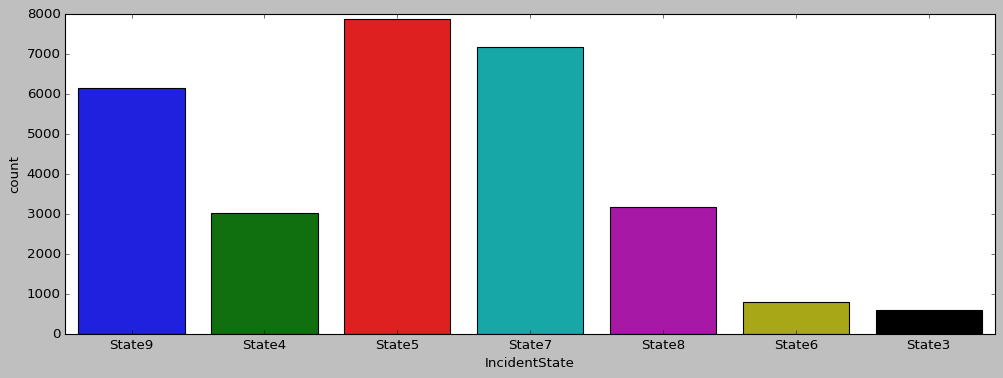

In [ ]:
# See the states where incidents are occuring more
sns.countplot(x='IncidentState', data=merged_data)
plt.title("Incident state VS Number of Records")

**Observation**:
  states 5,7,9 are the top 3 locations where more incidents took place.

In [ ]:
merged_data.IncidentCity.value_counts()

City2    4486
City1    4374
City4    4311
City7    4216
City3    4073
City5    3698
City6    3678
Name: IncidentCity, dtype: int64

Text(0.5, 1.0, 'Cities where incidents took place')

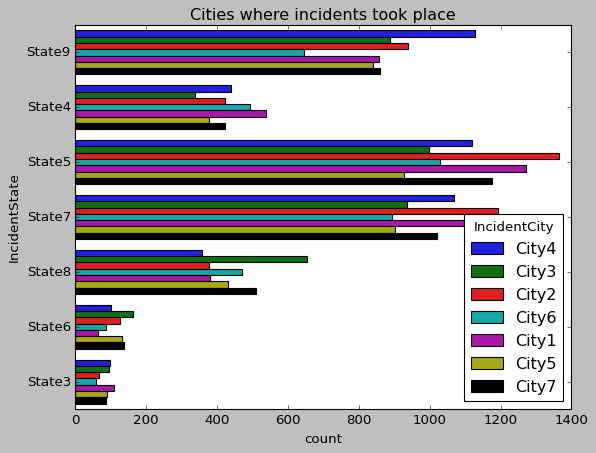

In [ ]:
 # What are the top cities of the state where incidents taking place
 sns.countplot(y="IncidentState", hue="IncidentCity", data=merged_data)
 plt.title('Cities where incidents took place')

Text(0, 0.5, 'Number of claims')

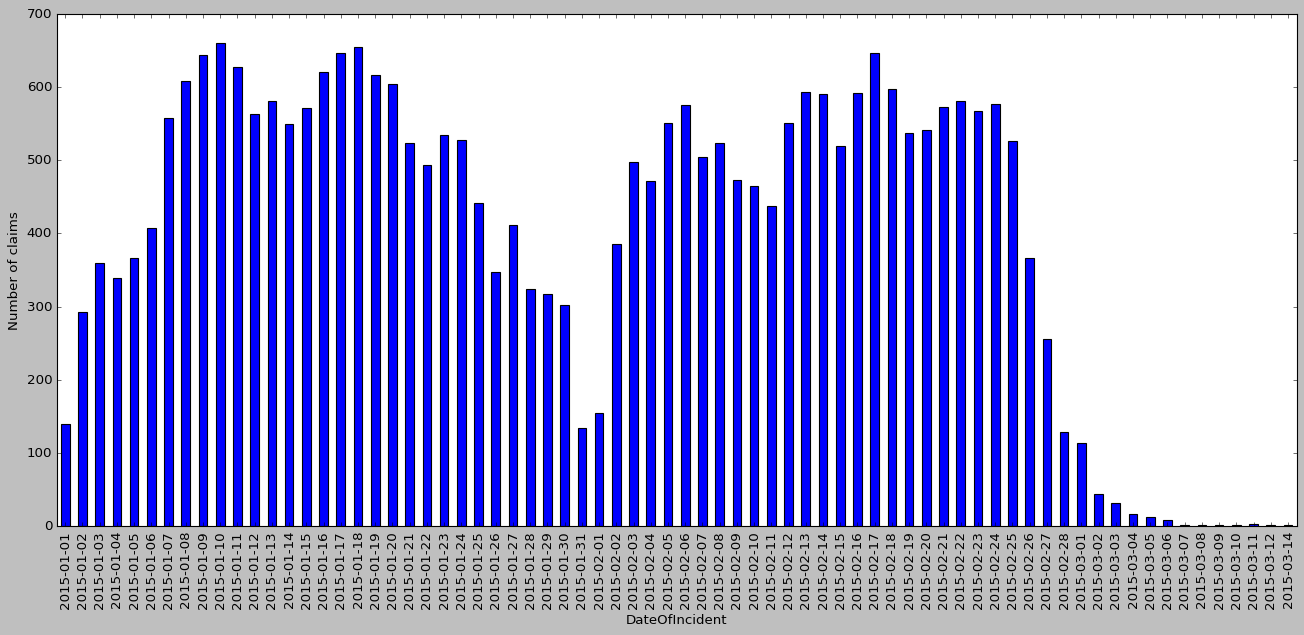

In [ ]:
# Date of Incidents in the data belonging to
fig = plt.figure(figsize=(20,8))
ax = merged_data.groupby('DateOfIncident').AmountOfTotalClaim.count().plot.bar(ylim=0)
ax.set_ylabel('Number of claims')


In [ ]:
merged_data.IncidentTime.value_counts(sort=True)

 16    1616
 17    1615
 6     1564
 15    1541
 14    1461
 5     1434
 13    1420
 18    1419
 4     1406
 12    1363
 7     1331
 11    1286
 19    1280
 8     1251
 3     1232
 9     1210
 10    1165
 20    1153
 21     971
 22     809
 2      713
 1      648
 23     526
 0      391
-5       31
Name: IncidentTime, dtype: int64

In [ ]:
# Converting Hour of the day to Period of the day
bins = [ -5, 0, 3, 6, 9, 12, 17, 20, 24]
names = ["Not_known", "past_midnight", "early_morning", "morning", "fore-noon", "afternoon", "evening", "night"]
merged_data['IncidentPeriod']= pd.cut(merged_data['IncidentTime'], bins=bins, labels=names)

In [ ]:
merged_data.head()

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,VehicleID,VehicleMake,VehicleModel,VehicleYOM,IncidentPeriod
0,Cust20065,2015-01-09,Multi-vehicle Collision,Rear Collision,Total Loss,Other,State9,City4,Location 1404,19,3,?,1,1.0,?,43973.0,9396,4698,29879,58,471784,MALE,JD,sales,video-games,0,-42700,India,129186,432,1998-11-14,State2,250/500,2000,1142.87,0,own-child,Vehicle30662,Mercedes,E400,2005,evening
1,Cust37589,2015-02-20,Single Vehicle Collision,Side Collision,Minor Damage,Ambulance,State4,City3,Location 1675,14,1,?,1,1.0,YES,62310.0,6539,6539,49232,34,431937,FEMALE,High School,transport-moving,polo,51300,0,India,146710,128,2000-08-19,State2,100/300,1000,1274.38,2857344,own-child,Vehicle17183,Toyota,Highlander,2010,afternoon
2,Cust24312,2015-01-14,Multi-vehicle Collision,Side Collision,Major Damage,Ambulance,State5,City2,Location 1546,21,3,?,0,0.0,?,42824.0,6069,6069,30686,52,479320,FEMALE,PhD,machine-op-inspct,exercise,0,0,India,133433,346,2000-06-23,State1,500/1000,745,1269.93,0,other-relative,Vehicle33982,Volkswagen,Passat,2002,night
3,Cust5493,2015-01-07,Multi-vehicle Collision,Side Collision,Major Damage,Ambulance,State7,City4,Location 1413,12,3,YES,2,0.0,?,45672.0,253,5741,39678,25,607763,FEMALE,College,exec-managerial,exercise,47400,-56100,India,114614,42,1992-01-15,State2,100/300,986,1218.60,0,other-relative,Vehicle12299,Toyota,Highlander,2011,fore-noon
4,Cust7704,2015-02-26,Multi-vehicle Collision,Side Collision,Major Damage,Other,State4,City6,Location 1367,3,3,NO,1,2.0,NO,81472.0,7407,14813,59252,27,441783,MALE,Masters,sales,chess,0,0,India,116825,109,2001-09-23,State3,250/500,576,1431.02,4235779,unmarried,Vehicle30447,Ford,Wrangler,2010,past_midnight


[Text(0, 0, 'Not_known'),
 Text(0, 0, 'past_midnight'),
 Text(0, 0, 'early_morning'),
 Text(0, 0, 'morning'),
 Text(0, 0, 'fore-noon'),
 Text(0, 0, 'afternoon'),
 Text(0, 0, 'evening'),
 Text(0, 0, 'night')]

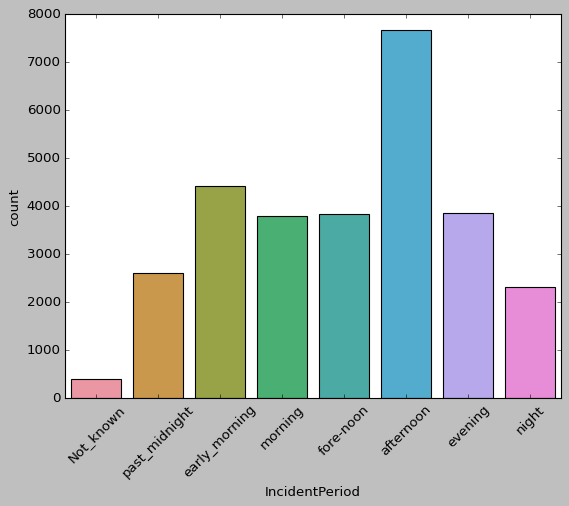

In [ ]:
# Time period the day where incidents are taking place
ax = sns.countplot(x='IncidentPeriod', data=merged_data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

**Observation**:
  Most of the incidents took palce during afternoon

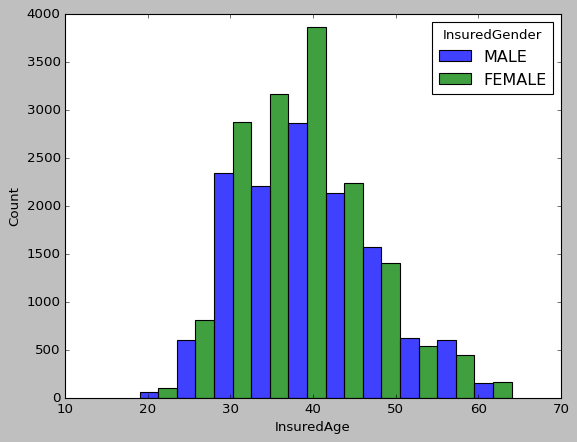

In [ ]:
# Insured age distribution
sns.histplot(data=merged_data, x="InsuredAge", hue="InsuredGender", multiple="dodge", bins=10)



In [ ]:
merged_data.columns

Index(['CustomerID', 'DateOfIncident', 'TypeOfIncident', 'TypeOfCollission',
       'SeverityOfIncident', 'AuthoritiesContacted', 'IncidentState',
       'IncidentCity', 'IncidentAddress', 'IncidentTime', 'NumberOfVehicles',
       'PropertyDamage', 'BodilyInjuries', 'Witnesses', 'PoliceReport',
       'AmountOfTotalClaim', 'AmountOfInjuryClaim', 'AmountOfPropertyClaim',
       'AmountOfVehicleDamage', 'InsuredAge', 'InsuredZipCode',
       'InsuredGender', 'InsuredEducationLevel', 'InsuredOccupation',
       'InsuredHobbies', 'CapitalGains', 'CapitalLoss', 'Country',
       'InsurancePolicyNumber', 'CustomerLoyaltyPeriod',
       'DateOfPolicyCoverage', 'InsurancePolicyState',
       'Policy_CombinedSingleLimit', 'Policy_Deductible',
       'PolicyAnnualPremium', 'UmbrellaLimit', 'InsuredRelationship',
       'VehicleID', 'VehicleMake', 'VehicleModel', 'VehicleYOM'],
      dtype='object')

In [ ]:
merged_data.InsuredEducationLevel.value_counts(sort=True)

JD             4808
High School    4583
MD             4161
Masters        4141
Associate      4125
PhD            3556
College        3462
Name: InsuredEducationLevel, dtype: int64

Text(0.5, 1.0, 'Insured Education Level')

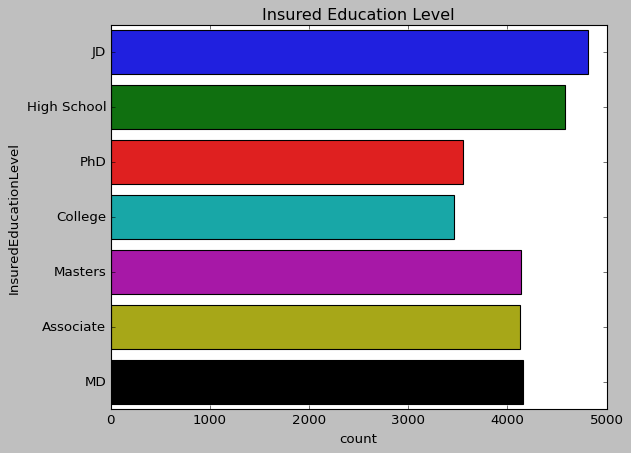

In [ ]:
# Quick check on Insured Education Level from the demographic data
sns.countplot(y="InsuredEducationLevel", data=merged_data)
plt.title("Insured Education Level")

Text(0.5, 1.0, 'Type of Occupation of Insured people VS Number of records')

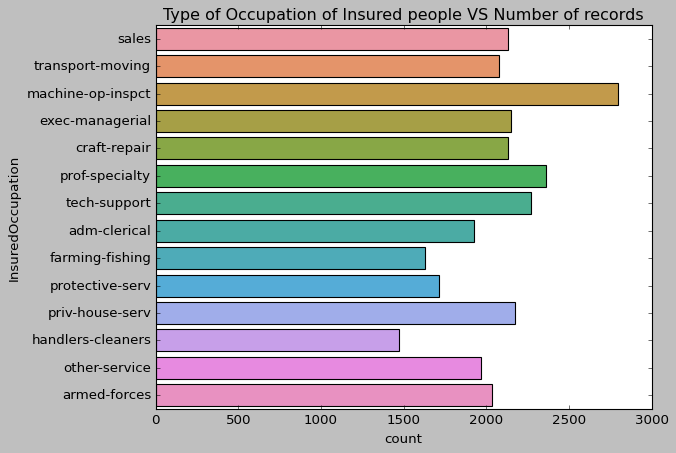

In [ ]:
# People belonging to which occupation the records belongs to
sns.countplot(y="InsuredOccupation", data=merged_data)
plt.title("Type of Occupation of Insured people VS Number of records")

In [ ]:
merged_data.head()

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,VehicleID,VehicleMake,VehicleModel,VehicleYOM
0,Cust20065,2015-01-09,Multi-vehicle Collision,Rear Collision,Total Loss,Other,State9,City4,Location 1404,19,3,?,1,1.0,?,43973.0,9396,4698,29879,58,471784,MALE,JD,sales,video-games,0,-42700,India,129186,432,1998-11-14,State2,250/500,2000,1142.87,0,own-child,Vehicle30662,Mercedes,E400,2005
1,Cust37589,2015-02-20,Single Vehicle Collision,Side Collision,Minor Damage,Ambulance,State4,City3,Location 1675,14,1,?,1,1.0,YES,62310.0,6539,6539,49232,34,431937,FEMALE,High School,transport-moving,polo,51300,0,India,146710,128,2000-08-19,State2,100/300,1000,1274.38,2857344,own-child,Vehicle17183,Toyota,Highlander,2010
2,Cust24312,2015-01-14,Multi-vehicle Collision,Side Collision,Major Damage,Ambulance,State5,City2,Location 1546,21,3,?,0,0.0,?,42824.0,6069,6069,30686,52,479320,FEMALE,PhD,machine-op-inspct,exercise,0,0,India,133433,346,2000-06-23,State1,500/1000,745,1269.93,0,other-relative,Vehicle33982,Volkswagen,Passat,2002
3,Cust5493,2015-01-07,Multi-vehicle Collision,Side Collision,Major Damage,Ambulance,State7,City4,Location 1413,12,3,YES,2,0.0,?,45672.0,253,5741,39678,25,607763,FEMALE,College,exec-managerial,exercise,47400,-56100,India,114614,42,1992-01-15,State2,100/300,986,1218.60,0,other-relative,Vehicle12299,Toyota,Highlander,2011
4,Cust7704,2015-02-26,Multi-vehicle Collision,Side Collision,Major Damage,Other,State4,City6,Location 1367,3,3,NO,1,2.0,NO,81472.0,7407,14813,59252,27,441783,MALE,Masters,sales,chess,0,0,India,116825,109,2001-09-23,State3,250/500,576,1431.02,4235779,unmarried,Vehicle30447,Ford,Wrangler,2010


In [ ]:
merged_data.UmbrellaLimit.describe()

count    2.883600e+04
mean     9.836680e+05
std      1.969282e+06
min     -1.000000e+06
25%      0.000000e+00
50%      0.000000e+00
75%      4.859610e+05
max      1.000000e+07
Name: UmbrellaLimit, dtype: float64

Text(0, 0.5, 'Number of Records')

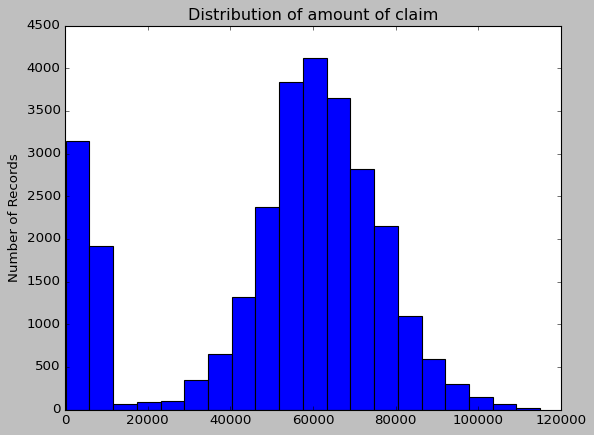

In [ ]:
# Range of Total amount of claim in the data
plt.hist(x=merged_data['AmountOfTotalClaim'], bins=20, )
plt.title("Distribution of amount of claim")
plt.ylabel("Number of Records")


In [ ]:
# Subsetting customers with umbrella limit
umbrella_limt= merged_data[merged_data.UmbrellaLimit!= 0]
umbrella_limt.head()

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,VehicleID,VehicleMake,VehicleModel,VehicleYOM
1,Cust37589,2015-02-20,Single Vehicle Collision,Side Collision,Minor Damage,Ambulance,State4,City3,Location 1675,14,1,?,1,1.0,YES,62310.0,6539,6539,49232,34,431937,FEMALE,High School,transport-moving,polo,51300,0,India,146710,128,2000-08-19,State2,100/300,1000,1274.38,2857344,own-child,Vehicle17183,Toyota,Highlander,2010
4,Cust7704,2015-02-26,Multi-vehicle Collision,Side Collision,Major Damage,Other,State4,City6,Location 1367,3,3,NO,1,2.0,NO,81472.0,7407,14813,59252,27,441783,MALE,Masters,sales,chess,0,0,India,116825,109,2001-09-23,State3,250/500,576,1431.02,4235779,unmarried,Vehicle30447,Ford,Wrangler,2010
11,Cust25861,2015-02-14,Multi-vehicle Collision,Rear Collision,Total Loss,Fire,State8,City4,Location 1172,14,3,YES,1,1.0,?,72456.0,2666,13174,56616,36,472573,FEMALE,JD,protective-serv,polo,0,-70900,India,134982,197,1996-05-09,State2,100/300,500,1369.71,3966562,own-child,Vehicle17424,Honda,Escape,2011
12,Cust33706,2015-02-04,Parked Car,?,Minor Damage,None,State5,City4,Location 1421,6,1,NO,1,2.0,NO,5326.0,1009,504,3813,48,432699,FEMALE,JD,tech-support,hiking,0,0,India,142827,323,2003-10-18,State2,250/500,500,1406.33,6117043,other-relative,Vehicle37690,Saab,92x,2006
15,Cust6129,2015-02-27,Single Vehicle Collision,Side Collision,Major Damage,Ambulance,State9,City6,Location 1969,10,3,NO,2,2.0,?,67291.0,7444,7737,52110,37,610393,MALE,JD,craft-repair,yachting,0,-56200,India,115250,160,2007-06-19,State2,100/500,2000,1333.19,7917174,husband,Vehicle8121,Ford,F150,2006


Text(0.5, 1.0, 'Distribution of amount of claim')

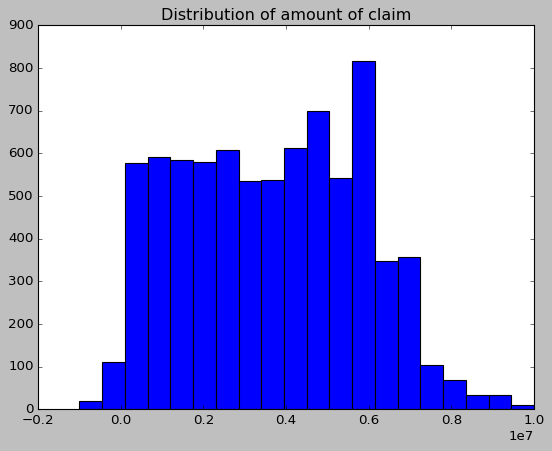

In [ ]:
# Dist plot
plt.hist(x=umbrella_limt['UmbrellaLimit'], bins=20)
plt.title("Distribution of umbrella limit")


Text(0.5, 1.0, 'Box Plot')

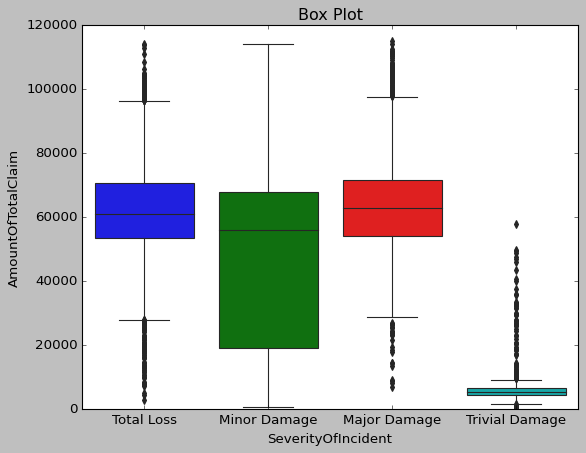

In [ ]:
#Box plot
sns.boxplot(x='SeverityOfIncident',y='AmountOfTotalClaim', data=merged_data)
plt.title("Box Plot")

In [ ]:
# Calculating the financial status of the customer
merged_data['Status'] = merged_data['CapitalGains'] + merged_data['CapitalLoss']
merged_data.head()

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,VehicleID,VehicleMake,VehicleModel,VehicleYOM,IncidentPeriod,Status
0,Cust20065,2015-01-09,Multi-vehicle Collision,Rear Collision,Total Loss,Other,State9,City4,Location 1404,19,3,?,1,1.0,?,43973.0,9396,4698,29879,58,471784,MALE,JD,sales,video-games,0,-42700,India,129186,432,1998-11-14,State2,250/500,2000,1142.87,0,own-child,Vehicle30662,Mercedes,E400,2005,evening,-42700
1,Cust37589,2015-02-20,Single Vehicle Collision,Side Collision,Minor Damage,Ambulance,State4,City3,Location 1675,14,1,?,1,1.0,YES,62310.0,6539,6539,49232,34,431937,FEMALE,High School,transport-moving,polo,51300,0,India,146710,128,2000-08-19,State2,100/300,1000,1274.38,2857344,own-child,Vehicle17183,Toyota,Highlander,2010,afternoon,51300
2,Cust24312,2015-01-14,Multi-vehicle Collision,Side Collision,Major Damage,Ambulance,State5,City2,Location 1546,21,3,?,0,0.0,?,42824.0,6069,6069,30686,52,479320,FEMALE,PhD,machine-op-inspct,exercise,0,0,India,133433,346,2000-06-23,State1,500/1000,745,1269.93,0,other-relative,Vehicle33982,Volkswagen,Passat,2002,night,0
3,Cust5493,2015-01-07,Multi-vehicle Collision,Side Collision,Major Damage,Ambulance,State7,City4,Location 1413,12,3,YES,2,0.0,?,45672.0,253,5741,39678,25,607763,FEMALE,College,exec-managerial,exercise,47400,-56100,India,114614,42,1992-01-15,State2,100/300,986,1218.60,0,other-relative,Vehicle12299,Toyota,Highlander,2011,fore-noon,-8700
4,Cust7704,2015-02-26,Multi-vehicle Collision,Side Collision,Major Damage,Other,State4,City6,Location 1367,3,3,NO,1,2.0,NO,81472.0,7407,14813,59252,27,441783,MALE,Masters,sales,chess,0,0,India,116825,109,2001-09-23,State3,250/500,576,1431.02,4235779,unmarried,Vehicle30447,Ford,Wrangler,2010,past_midnight,0


In [ ]:
merged_data.Status.describe()

count     28836.000000
mean      -1874.042863
std       38285.827348
min     -111100.000000
25%      -31600.000000
50%           0.000000
75%       21500.000000
max      100500.000000
Name: Status, dtype: float64

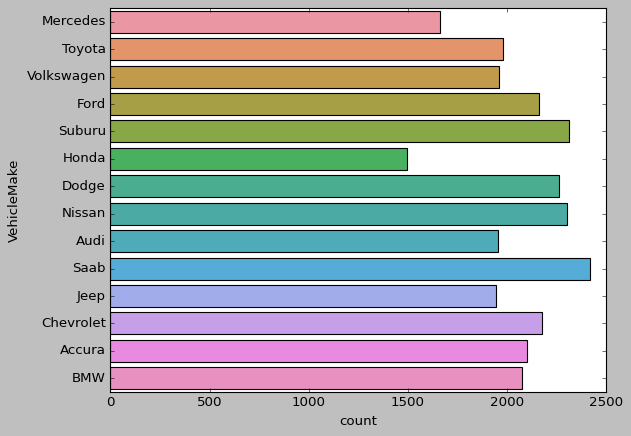

In [ ]:
# Type of Brands and count
sns.countplot(y='VehicleMake', data=merged_data)

**Observation**:
  There are more number of customers belonging to brand Saab and Suburu